In [4]:
import pandas as pd
import numpy as np
import sys

# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'stats315b/Project/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df_feng_stats_ready_train = pd.read_csv("/content/drive/My Drive/stats315b/Project/df_feng_stats_ready_train.csv")
# df_feng_stats_ready_test = pd.read_csv("/content/drive/My Drive/stats315b/Project/df_feng_stats_ready_test.csv")

# rows_train = df_feng_stats_ready_train.shape[0]

# df_feng_stats_ready = pd.concat([df_feng_stats_ready_train, df_feng_stats_ready_test], axis=0)

# df_feng_stats_ready['NumSevHypo'] = df_feng_stats_ready['NumSevHypo'].astype(str)

# df_feng_stats_ready = pd.get_dummies(df_feng_stats_ready)

# df_feng_stats_ready = df_feng_stats_ready.drop(columns="Unnamed: 0")

# df_feng_stats_ready.shape


# FOR RF on REPLICATED DATASET:

# Training Metrics:
# Mean Absolute Error (MAE): 0.14
# Mean Squared Error (MSE): 0.03
# Root Mean Squared Error (RMSE): 0.19
# R-squared (R2): 0.96
# Adjusted R-squared: 0.95

# Validation Metrics:
# Mean Absolute Error (MAE): 0.300
# Mean Squared Error (MSE): 0.154
# Root Mean Squared Error (RMSE): 0.392
# Proportion within 1 percent point: 98.19
# Proportion within 0.5 percent point: 82.81

In [5]:
df_feng_stats_and_roc_ready_train = pd.read_csv("/content/drive/My Drive/stats315b/Project/df_feng_stats_and_roc_ready_train.csv")
df_feng_stats_and_roc_ready_test = pd.read_csv("/content/drive/My Drive/stats315b/Project/df_feng_stats_and_roc_ready_test.csv")

rows_train = df_feng_stats_and_roc_ready_train.shape[0]

df_feng_stats_and_roc_ready = pd.concat([df_feng_stats_and_roc_ready_train, df_feng_stats_and_roc_ready_test], axis=0)

df_feng_stats_and_roc_ready['NumSevHypo'] = df_feng_stats_and_roc_ready['NumSevHypo'].astype(str)

df_feng_stats_and_roc_ready = pd.get_dummies(df_feng_stats_and_roc_ready)

df_feng_stats_and_roc_ready = df_feng_stats_and_roc_ready.drop(columns="Unnamed: 0")

df_feng_stats_and_roc_ready.head()
df_feng_stats_and_roc_ready.shape

(885, 53)

In [6]:
rows_train

664

In [7]:
train_data = df_feng_stats_and_roc_ready[:rows_train]
validation_data = df_feng_stats_and_roc_ready[rows_train:]

train_data.shape, validation_data.shape

((664, 53), (221, 53))

In [8]:
target = "HbA1c"
features = list(train_data.columns)

features.remove("HbA1c")
features.remove("HbA1c_prev") # Can be commented out to test the effect of previous HbA1c measures
len(features)

51

In [9]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor(max_depth=4)
decision_tree_model.fit(train_data[features], train_data[target])

DecisionTreeRegressor(max_depth=4)

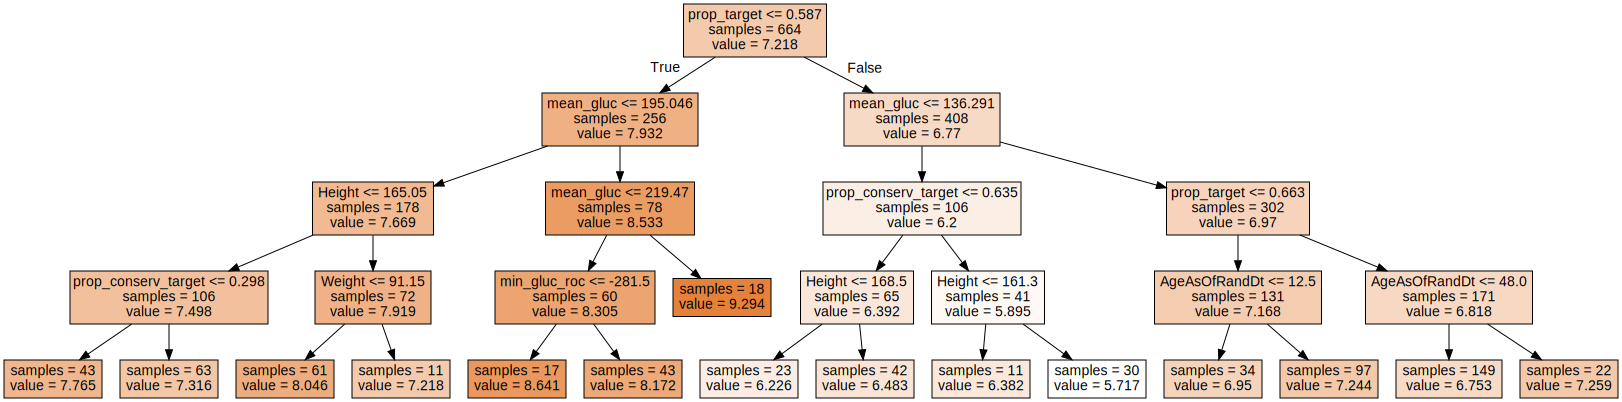

In [11]:
import graphviz
from sklearn import tree


def draw_tree(tree_model, features):
    """
    visualizes a Decision Tree
    """
    tree_data = tree.export_graphviz(tree_model, 
                                    impurity=False, 
                                    feature_names=features,
                                    filled=True,
                                    out_file=None)
    graph = graphviz.Source(tree_data) 
    display(graph)
    
small_tree_model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=6)
small_tree_model.fit(train_data[features], train_data[target])
draw_tree(small_tree_model, features)

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# get predictions on training and validation data
training_predictions = decision_tree_model.predict(train_data[features])
validation_predictions = decision_tree_model.predict(validation_data[features])

# compute regression evaluation metrics
mae = mean_absolute_error(train_data[target], training_predictions)
mse = mean_squared_error(train_data[target], training_predictions)
rmse = mean_squared_error(train_data[target], training_predictions, squared=False)
r2 = r2_score(train_data[target], training_predictions)
# compute adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (len(train_data) - 1)) / (len(train_data) - len(features) - 1)

print(f'Training Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

# compute validation metrics
mae = mean_absolute_error(validation_data[target], validation_predictions)
mse = mean_squared_error(validation_data[target], validation_predictions)
rmse = mean_squared_error(validation_data[target], validation_predictions, squared=False)
within_1_error = (1 - sum(abs(validation_predictions - validation_data[target]) >= 1) / len(validation_data)) * 100
within_05_error = (1 - sum(abs(validation_predictions - validation_data[target]) >= 0.5) / len(validation_data)) * 100


print(f'\nValidation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Proportion within 1 percent point: {within_1_error:.2f}')
print(f'Proportion within 0.5 percent point: {within_05_error:.2f}')

Training Metrics:
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.22
Root Mean Squared Error (RMSE): 0.47
R-squared (R2): 0.72
Adjusted R-squared: 0.69

Validation Metrics:
Mean Absolute Error (MAE): 0.382
Mean Squared Error (MSE): 0.255
Root Mean Squared Error (RMSE): 0.505
Proportion within 1 percent point: 95.02
Proportion within 0.5 percent point: 71.95


In [13]:
# fit big tree model
big_tree_model = DecisionTreeRegressor(max_depth=10)   
big_tree_model.fit(train_data[features], train_data[target])

# get predictions on training and validation data
training_predictions_big_tree = big_tree_model.predict(train_data[features])
validation_predictions_big_tree = big_tree_model.predict(validation_data[features])

# compute regression evaluation metrics
mae = mean_absolute_error(train_data[target], training_predictions_big_tree)
mse = mean_squared_error(train_data[target], training_predictions_big_tree)
rmse = mean_squared_error(train_data[target], training_predictions_big_tree, squared=False)
r2 = r2_score(train_data[target], training_predictions_big_tree)
# compute adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (len(train_data) - 1)) / (len(train_data) - len(features) - 1)

print(f'Training Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

# compute validation metrics
mae = mean_absolute_error(validation_data[target], validation_predictions_big_tree)
mse = mean_squared_error(validation_data[target], validation_predictions_big_tree)
rmse = mean_squared_error(validation_data[target], validation_predictions_big_tree, squared=False)
within_1_error = (1 - sum(abs(validation_predictions_big_tree - validation_data[target]) >= 1) / len(validation_data)) * 100
within_05_error = (1 - sum(abs(validation_predictions_big_tree - validation_data[target]) >= 0.5) / len(validation_data)) * 100


print(f'\nValidation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Proportion within 1 percent point: {within_1_error:.2f}')
print(f'Proportion within 0.5 percent point: {within_05_error:.2f}')


Training Metrics:
Mean Absolute Error (MAE): 0.10
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.18
R-squared (R2): 0.96
Adjusted R-squared: 0.95

Validation Metrics:
Mean Absolute Error (MAE): 0.450
Mean Squared Error (MSE): 0.343
Root Mean Squared Error (RMSE): 0.586
Proportion within 1 percent point: 89.14
Proportion within 0.5 percent point: 61.54


In [14]:
from sklearn.model_selection import GridSearchCV

# TODO Use GridSearchCV to find best settings of hyperparameters
hyperparameters = {
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 
                         21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 
                         41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
}

reg_tree = DecisionTreeRegressor(random_state=6)
search = GridSearchCV(reg_tree, hyperparameters, cv=10, return_train_score=True, scoring='neg_mean_absolute_error')
search.fit(train_data[features], train_data[target])
print(f'Best hyperparameters: {search.best_params_}') 

Best hyperparameters: {'max_depth': 7, 'min_samples_leaf': 29}


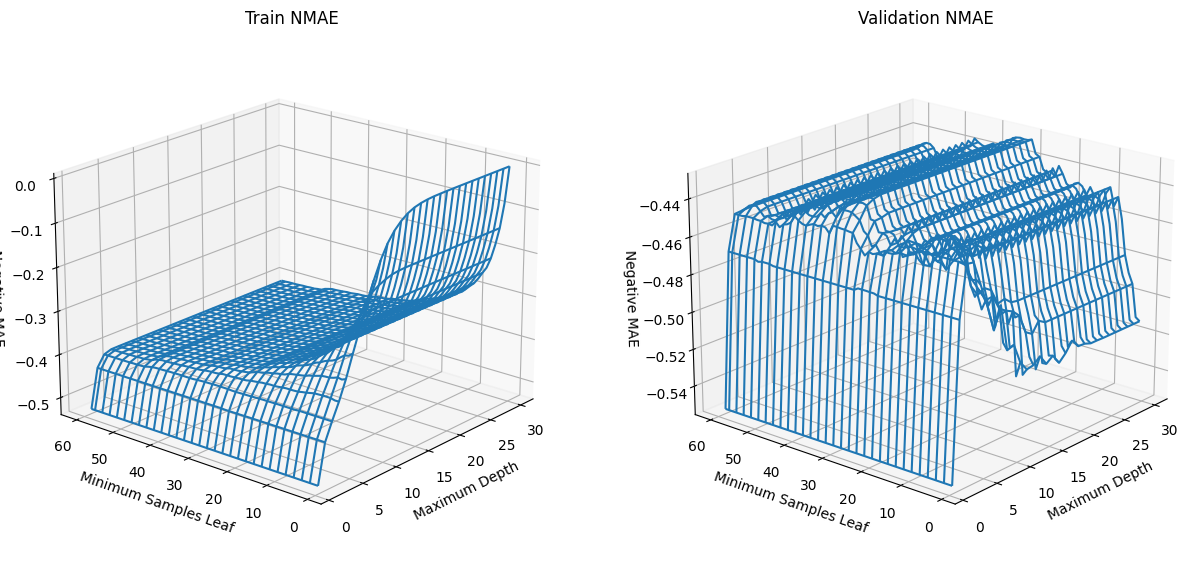

In [15]:
import matplotlib.pyplot as plt

def plot_scores(ax, title, search, hyperparameters, score_key):
    # Get results from GridSearch and turn scores into matrix
    cv_results = search.cv_results_
    scores = cv_results[score_key]
    scores = scores.reshape((len(hyperparameters['max_depth']), len(hyperparameters['min_samples_leaf'])))
    max_depths = cv_results['param_max_depth'].reshape(scores.shape).data.astype(int)
    min_samples_leafs = cv_results['param_min_samples_leaf'].reshape(scores.shape).data.astype(int)
    
    # Plot result
    ax.plot_wireframe(max_depths, min_samples_leafs, scores)
    ax.view_init(20, 220)
    ax.set_xlabel('Maximum Depth')
    ax.set_ylabel('Minimum Samples Leaf')
    ax.set_zlabel('Negative MAE')
    ax.set_title(title)


fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
plot_scores(ax1, 'Train NMAE', search, hyperparameters, 'mean_train_score')
plot_scores(ax2, 'Validation NMAE', search, hyperparameters, 'mean_test_score')

In [16]:
# fit best parameters tree model
best_param_tree_model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=29)   
best_param_tree_model.fit(train_data[features], train_data[target])

# get predictions on training and validation data
training_predictions_best_param_tree = best_param_tree_model.predict(train_data[features])
validation_predictions_best_param_tree = best_param_tree_model.predict(validation_data[features])

# compute regression evaluation metrics
mae = mean_absolute_error(train_data[target], training_predictions_best_param_tree)
mse = mean_squared_error(train_data[target], training_predictions_best_param_tree)
rmse = mean_squared_error(train_data[target], training_predictions_best_param_tree, squared=False)
r2 = r2_score(train_data[target], training_predictions_best_param_tree)
# compute adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (len(train_data) - 1)) / (len(train_data) - len(features) - 1)

print(f'Training Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

# compute validation metrics
mae = mean_absolute_error(validation_data[target], validation_predictions_best_param_tree)
mse = mean_squared_error(validation_data[target], validation_predictions_best_param_tree)
rmse = mean_squared_error(validation_data[target], validation_predictions_best_param_tree, squared=False)
within_1_error = (1 - sum(abs(validation_predictions_best_param_tree - validation_data[target]) >= 1) / len(validation_data)) * 100
within_05_error = (1 - sum(abs(validation_predictions_best_param_tree - validation_data[target]) >= 0.5) / len(validation_data)) * 100


print(f'\nValidation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Proportion within 1 percent point: {within_1_error:.2f}')
print(f'Proportion within 0.5 percent point: {within_05_error:.2f}')

Training Metrics:
Mean Absolute Error (MAE): 0.37
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE): 0.49
R-squared (R2): 0.69
Adjusted R-squared: 0.66

Validation Metrics:
Mean Absolute Error (MAE): 0.375
Mean Squared Error (MSE): 0.225
Root Mean Squared Error (RMSE): 0.474
Proportion within 1 percent point: 96.83
Proportion within 0.5 percent point: 70.14


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Define the range of max_depth values to explore
max_depth_range = range(1, 21)

# Create an empty list to store the mean absolute errors
mae_scores = []

# Perform cross-validation using k-fold validation
for max_depth in max_depth_range:
    # Create the random forest model with the current max_depth
    rf_model = RandomForestRegressor(n_estimators=500, max_depth=max_depth, random_state=6)
    
    # Perform cross-validation and calculate the mean absolute error
    mae = -cross_val_score(rf_model, train_data[features], train_data[target], cv=5, scoring='neg_mean_absolute_error').mean()
    
    # Append the mean absolute error to the scores list
    mae_scores.append(mae)

# Find the best max_depth
best_max_depth = max_depth_range[mae_scores.index(min(mae_scores))]
print(f'Best maximum depth found by CV: {best_max_depth}')

# Create the final random forest model with the best max_depth
rf_model_final = RandomForestRegressor(n_estimators=500, max_depth=best_max_depth, random_state=6)

# Fit the model to the training data
rf_model_final.fit(train_data[features], train_data[target])

# Get predictions on training and validation data
training_predictions_rf = rf_model_final.predict(train_data[features])
validation_predictions_rf = rf_model_final.predict(validation_data[features])


Best maximum depth found by CV: 17


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# create the random forest model with max depth
rf_model = RandomForestRegressor(n_estimators=500, max_depth=17, random_state=6)

# fit the model to the training data
rf_model.fit(train_data[features], train_data[target])

# get predictions on training and validation data
training_predictions_rf = rf_model.predict(train_data[features])
validation_predictions_rf = rf_model.predict(validation_data[features])

# compute regression evaluation metrics
mae = mean_absolute_error(train_data[target], training_predictions_rf)
mse = mean_squared_error(train_data[target], training_predictions_rf)
rmse = mean_squared_error(train_data[target], training_predictions_rf, squared=False)
r2 = r2_score(train_data[target], training_predictions_rf)
# compute adjusted R-squared
adjusted_r2 = 1 - ((1 - r2) * (len(train_data) - 1)) / (len(train_data) - len(features) - 1)

print(f'Training Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Adjusted R-squared: {adjusted_r2:.2f}')

# compute validation metrics
mae = mean_absolute_error(validation_data[target], validation_predictions_rf)
mse = mean_squared_error(validation_data[target], validation_predictions_rf)
rmse = mean_squared_error(validation_data[target], validation_predictions_rf, squared=False)
within_1_error = (1 - sum(abs(validation_predictions_rf - validation_data[target]) >= 1) / len(validation_data)) * 100
within_05_error = (1 - sum(abs(validation_predictions_rf - validation_data[target]) >= 0.5) / len(validation_data)) * 100


print(f'\nValidation Metrics:')
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Proportion within 1 percent point: {within_1_error:.2f}')
print(f'Proportion within 0.5 percent point: {within_05_error:.2f}')


Training Metrics:
Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.19
R-squared (R2): 0.96
Adjusted R-squared: 0.95

Validation Metrics:
Mean Absolute Error (MAE): 0.306
Mean Squared Error (MSE): 0.159
Root Mean Squared Error (RMSE): 0.399
Proportion within 1 percent point: 98.64
Proportion within 0.5 percent point: 81.90


Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25
Depth 27
Depth 29


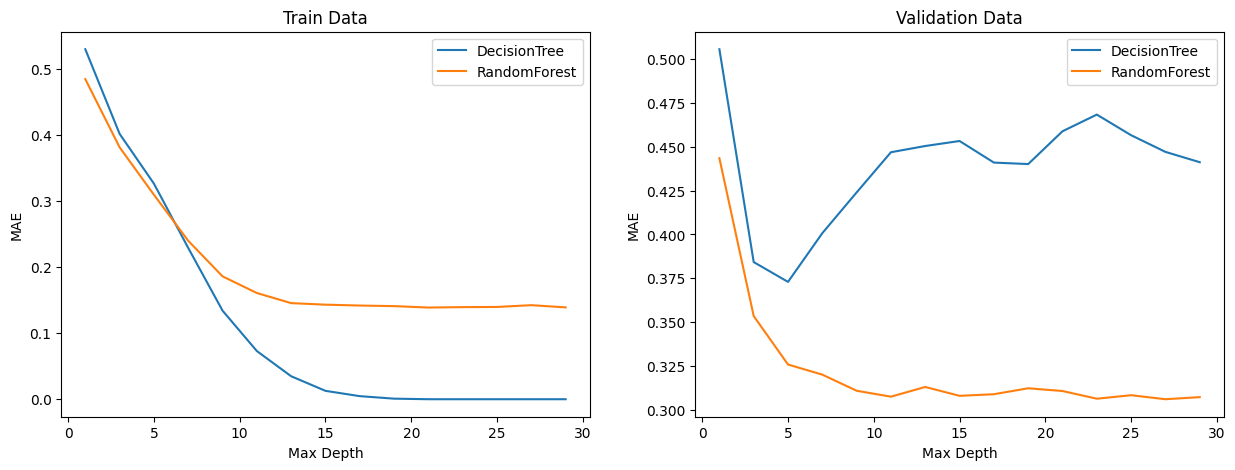

In [19]:
# First calculate the MAE for each depth
depths = list(range(1, 30, 2))
dt_MAE = []
rf_MAE = []

for i in depths:
    print(f'Depth {i}')

    # Train and evaluate a Decision Tree Regressor with given max_depth
    tree = DecisionTreeRegressor(max_depth=i)
    tree.fit(train_data[features], train_data[target])
    dt_MAE.append((
        mean_absolute_error(train_data[target], tree.predict(train_data[features])),
        mean_absolute_error(validation_data[target], tree.predict(validation_data[features]))
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForestRegressor(max_depth=i)
    rf.fit(train_data[features], train_data[target])
    rf_MAE.append((     
        mean_absolute_error(train_data[target], rf.predict(train_data[features])),
        mean_absolute_error(validation_data[target], rf.predict(validation_data[features]))
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(depths, [acc[0] for acc in dt_MAE], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_MAE], label='RandomForest')

# Plot validation accuracies
axs[1].plot(depths, [acc[1] for acc in dt_MAE], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_MAE], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('MAE')

Depth 1
Depth 3
Depth 5
Depth 7
Depth 9
Depth 11
Depth 13
Depth 15
Depth 17
Depth 19
Depth 21
Depth 23
Depth 25
Depth 27
Depth 29


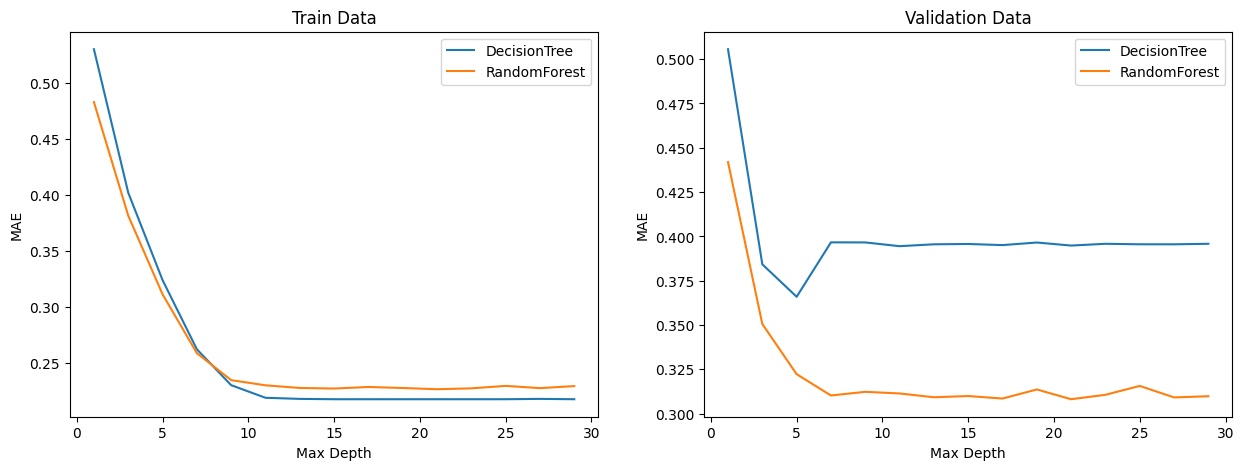

In [20]:
# First calculate the MAE for each depth
depths = list(range(1, 30, 2))
dt_MAE = []
rf_MAE = []

for i in depths:
    print(f'Depth {i}')

    # Train and evaluate a Decision Tree Regressor with given max_depth
    tree = DecisionTreeRegressor(max_depth=i, min_samples_leaf=5)
    tree.fit(train_data[features], train_data[target])
    dt_MAE.append((
        mean_absolute_error(train_data[target], tree.predict(train_data[features])),
        mean_absolute_error(validation_data[target], tree.predict(validation_data[features]))
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForestRegressor(max_depth=i, min_samples_leaf=5)
    rf.fit(train_data[features], train_data[target])
    rf_MAE.append((     
        mean_absolute_error(train_data[target], rf.predict(train_data[features])),
        mean_absolute_error(validation_data[target], rf.predict(validation_data[features]))
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(depths, [acc[0] for acc in dt_MAE], label='DecisionTree')
axs[0].plot(depths, [acc[0] for acc in rf_MAE], label='RandomForest')

# Plot validation accuracies
axs[1].plot(depths, [acc[1] for acc in dt_MAE], label='DecisionTree')
axs[1].plot(depths, [acc[1] for acc in rf_MAE], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Max Depth')
    ax.set_ylabel('MAE')

Min Number of Sample per Leaf: 1
Min Number of Sample per Leaf: 3
Min Number of Sample per Leaf: 5
Min Number of Sample per Leaf: 7
Min Number of Sample per Leaf: 9
Min Number of Sample per Leaf: 11
Min Number of Sample per Leaf: 13
Min Number of Sample per Leaf: 15
Min Number of Sample per Leaf: 17
Min Number of Sample per Leaf: 19
Min Number of Sample per Leaf: 21
Min Number of Sample per Leaf: 23
Min Number of Sample per Leaf: 25
Min Number of Sample per Leaf: 27
Min Number of Sample per Leaf: 29
Min Number of Sample per Leaf: 31
Min Number of Sample per Leaf: 33
Min Number of Sample per Leaf: 35
Min Number of Sample per Leaf: 37
Min Number of Sample per Leaf: 39
Min Number of Sample per Leaf: 41
Min Number of Sample per Leaf: 43
Min Number of Sample per Leaf: 45
Min Number of Sample per Leaf: 47
Min Number of Sample per Leaf: 49


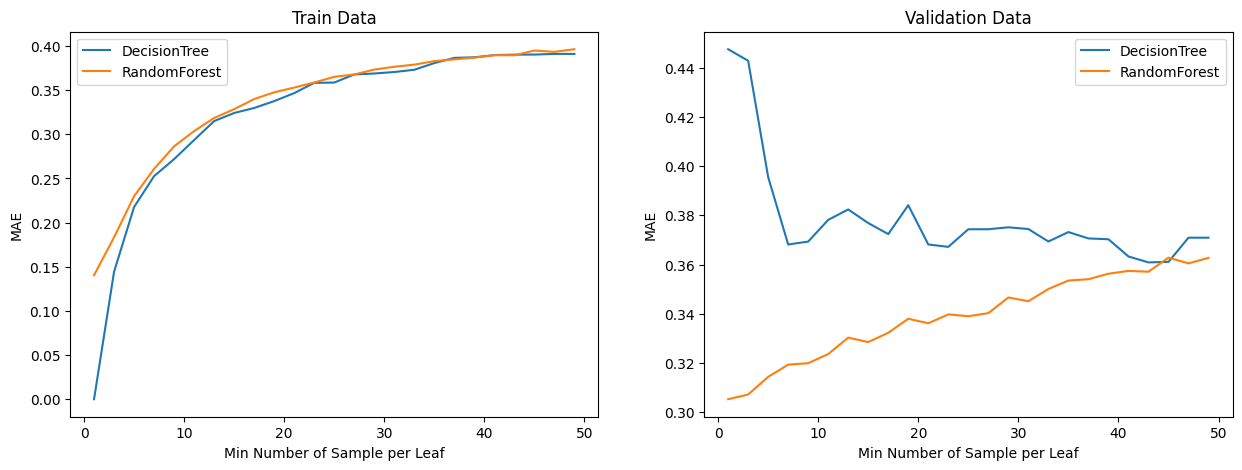

In [21]:
# First calculate the MAE for each depth
min_leaf = list(range(1, 50, 2))
dt_MAE = []
rf_MAE = []

for i in min_leaf:
    print(f'Min Number of Sample per Leaf: {i}')

    # Train and evaluate a Decision Tree Regressor with given min_leaf
    tree = DecisionTreeRegressor(min_samples_leaf=i)
    tree.fit(train_data[features], train_data[target])
    dt_MAE.append((
        mean_absolute_error(train_data[target], tree.predict(train_data[features])),
        mean_absolute_error(validation_data[target], tree.predict(validation_data[features]))
    ))
    
    # Train and evaluate our RandomForest classifier with given max_depth 
    rf = RandomForestRegressor(min_samples_leaf=i)
    rf.fit(train_data[features], train_data[target])
    rf_MAE.append((     
        mean_absolute_error(train_data[target], rf.predict(train_data[features])),
        mean_absolute_error(validation_data[target], rf.predict(validation_data[features]))
    ))
    
# Then plot the scores
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot training accuracies
axs[0].plot(min_leaf, [acc[0] for acc in dt_MAE], label='DecisionTree')
axs[0].plot(min_leaf, [acc[0] for acc in rf_MAE], label='RandomForest')

# Plot validation accuracies
axs[1].plot(min_leaf, [acc[1] for acc in dt_MAE], label='DecisionTree')
axs[1].plot(min_leaf, [acc[1] for acc in rf_MAE], label='RandomForest')

# Customize plots
axs[0].set_title('Train Data')
axs[1].set_title('Validation Data')
for ax in axs:
    ax.legend()
    ax.set_xlabel('Min Number of Sample per Leaf')
    ax.set_ylabel('MAE')